In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dataset=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
import scipy.cluster.hierarchy as sp

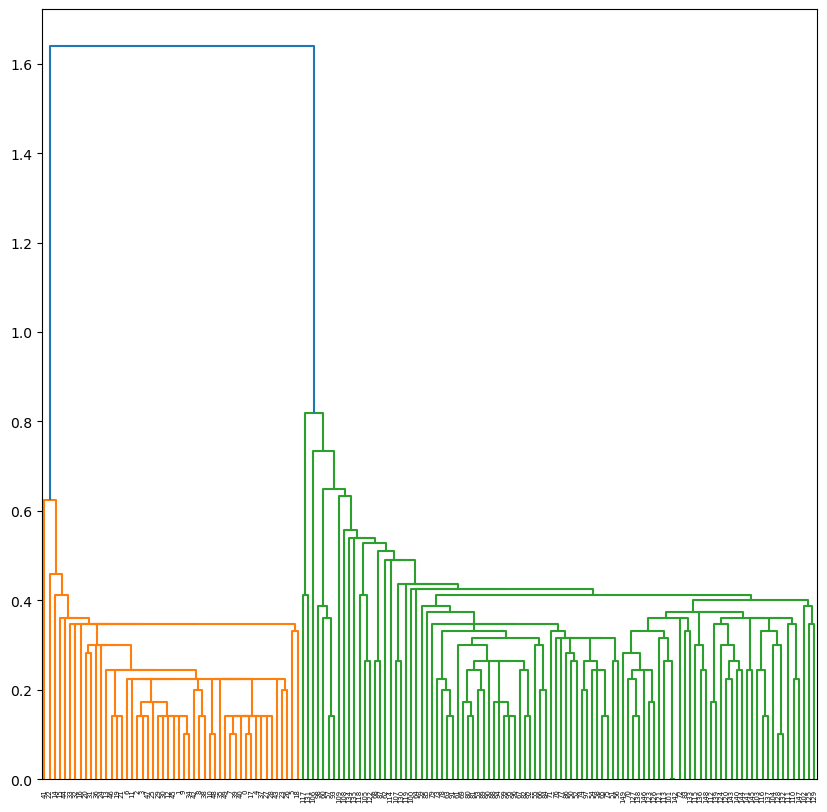

In [7]:
plt.figure(figsize=(10,10))
sp.dendrogram(sp.linkage(dataset,method="single",metric="euclidean"))
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
ac=AgglomerativeClustering(n_clusters=2,linkage="single")
dataset["predict"]=ac.fit_predict(dataset)

In [10]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


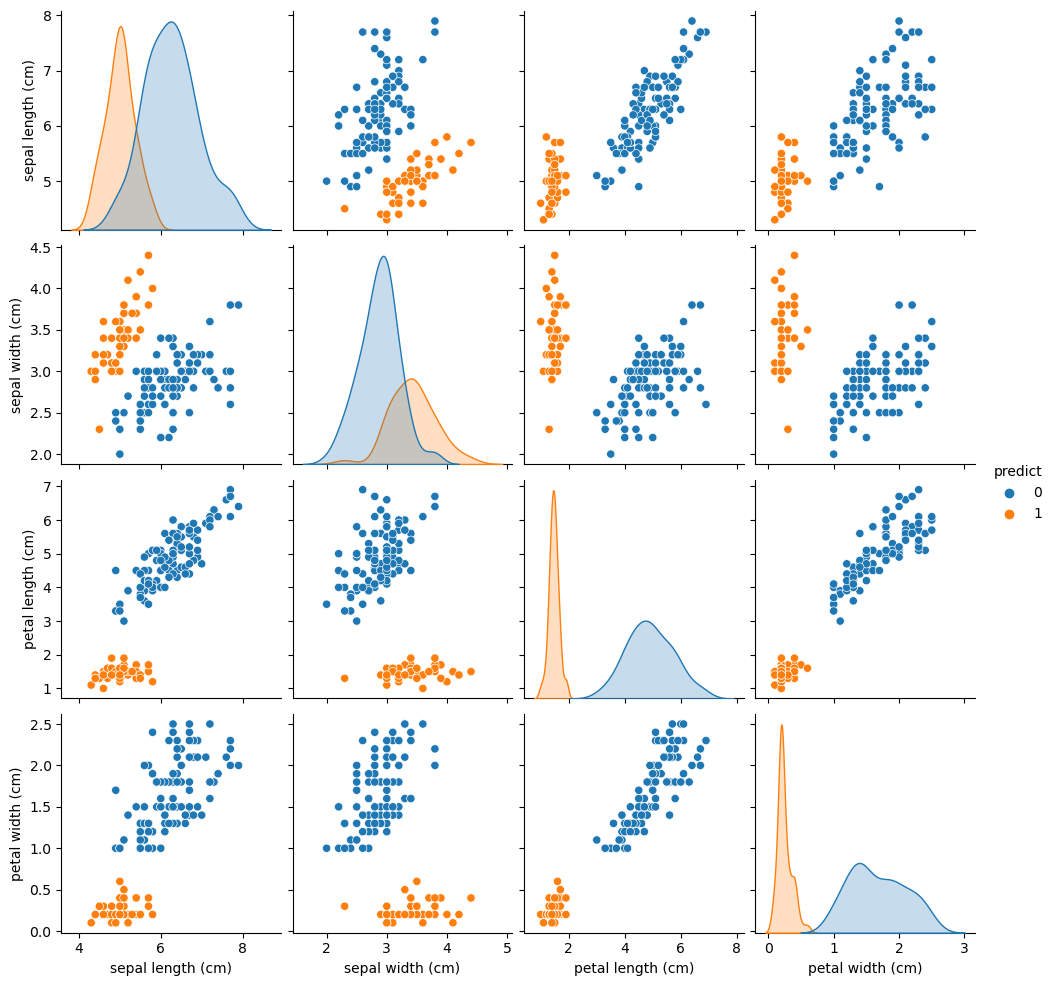

In [11]:
sns.pairplot(data=dataset,hue="predict")
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
ss=[]
no_cs=[j for j in range(2,20)]
for i in range(2,20):
    ag1=AgglomerativeClustering(n_clusters=i)
    ag1.fit(dataset)
    ss.append(silhouette_score(dataset,ag1.labels_))

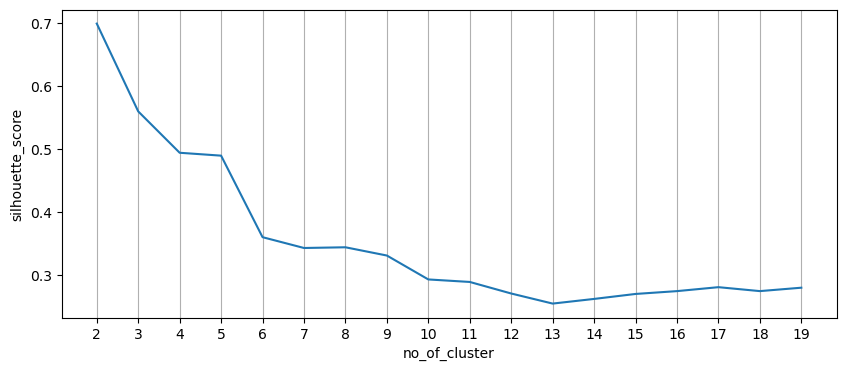

In [15]:
plt.figure(figsize=(10,4))
plt.plot(no_cs,ss)
plt.xlabel("no_of_cluster")
plt.ylabel("silhouette_score")
plt.xticks([j for j in range(2,20)])
plt.grid(axis="x")
plt.show()